In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### Load Data

In [4]:
from sklearn.datasets import load_wine
data = load_wine(return_X_y=False)
print(data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [5]:
data = load_wine(return_X_y=True)
X = data[0]
t = data[1]
X=pd.DataFrame(X)
t=pd.DataFrame(t)

#print(X)
#print(t)

#### Setup division of data

In [225]:
#X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3)
X_train, X_validate, X_test = np.split(X.sample(frac=1, random_state=42), [int(.6*len(X)), int(.8*len(X))])
t_train, t_validate, t_test = np.split(t.sample(frac=1, random_state=42), [int(.6*len(t)), int(.8*len(t))])
X_validate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 139 to 155
Data columns (total 13 columns):
0     36 non-null float64
1     36 non-null float64
2     36 non-null float64
3     36 non-null float64
4     36 non-null float64
5     36 non-null float64
6     36 non-null float64
7     36 non-null float64
8     36 non-null float64
9     36 non-null float64
10    36 non-null float64
11    36 non-null float64
12    36 non-null float64
dtypes: float64(13)
memory usage: 3.9 KB


In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_validate= scaler.transform(X_validate)
X_test = scaler.transform(X_test)

In [227]:
mlp = MLPClassifier(activation='logistic', alpha=1e-5,  solver = 'lbfgs', hidden_layer_sizes=(30,30,30))

#### train the model

In [228]:
mlp.fit(X_train, t_train)
predictions = mlp.predict(X_validate)
print(classification_report(t_validate,predictions))
print(accuracy_score(t_validate, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.91      1.00      0.95        10

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

0.9722222222222222


//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### test the model

In [229]:
y=mlp.predict(X_test)
print(classification_report(t_test,y))
print(accuracy_score(t_test, y))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       0.93      0.93      0.93        14
           2       1.00      0.91      0.95        11

    accuracy                           0.94        36
   macro avg       0.95      0.95      0.95        36
weighted avg       0.95      0.94      0.94        36

0.9444444444444444


#### Q1: tune the learning rate and batch size

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d

The optimal learning rate is 0.21000000000000002 with accuracy =  1.0


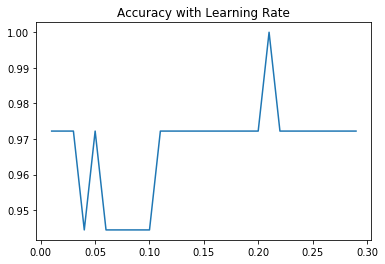

In [230]:
# learning rate 
learning_rate = np.arange(0.01, 0.3, 0.01)
accuracy = []
for i in learning_rate:
    clf = MLPClassifier(random_state=1, learning_rate_init=i).fit(X_train, t_train)
    accuracy.append(clf.score(X_test, t_test))
plt.title('Accuracy with Learning Rate')
plt.plot(learning_rate, accuracy)
print('The optimal learning rate is',learning_rate[accuracy.index(max(accuracy))],'with accuracy = ',max(accuracy))

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d

The optimal Batch Size is 10 with accuracy =  0.9722222222222222


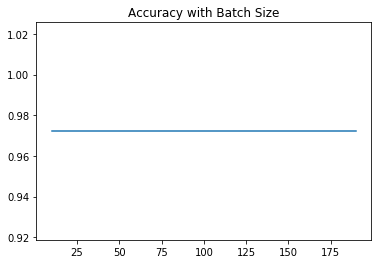

In [231]:
#Batch Size#
Batch_Size = np.arange(10, 200, 10)
accuracy = []
for j in Batch_Size:
    clf = MLPClassifier(random_state=1, max_iter=300,batch_size=j).fit(X_train, t_train)
    accuracy.append(clf.score(X_test, t_test))
plt.title('Accuracy with Batch Size')
plt.plot(Batch_Size, accuracy)
print('The optimal Batch Size is',Batch_Size[accuracy.index(max(accuracy))],'with accuracy = ',max(accuracy))

#### Q2. use 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, and 100% of the total training dataset

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d

The optimal training dataset percent is 0.7 with accuracy =  0.8148148148148148


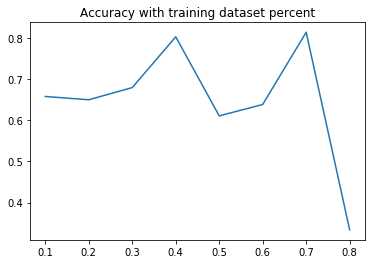

In [289]:
td_percent=np.arange(0.2,1,0.1)
accuracy = []
for a in td_percent:    
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = a)
    mlp = MLPClassifier(activation='logistic',alpha=1e-5,learning_rate_init=0.2,solver = 'lbfgs',batch_size=10,hidden_layer_sizes=(30,30,30))
    clf = mlp.fit(X_train, t_train)
    accuracy.append(clf.score(X_test, t_test))
plt.title('Accuracy with training dataset percent')
plt.plot((1-td_percent), accuracy)
print('The optimal training dataset percent is',1-td_percent[accuracy.index(max(accuracy))],'with accuracy = ',max(accuracy))

#### Q3. use 20%, 30%, 40%, 50%, 60%, 70%, 80%, 90%, and 100% of the features

//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d

The optimal features percent is 0.7 with accuracy =  0.9444444444444444


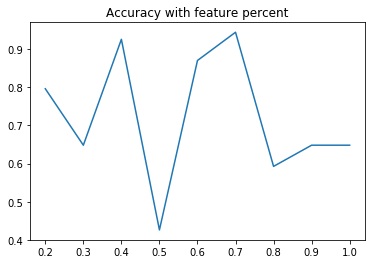

In [299]:
import random
frange = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
featuresnumber = [3,4,5,7,8,9,10,12,13]
accuracy=[]
for b in featuresnumber:
    data = load_wine(return_X_y=True)
    X = data[0]
    t = data[1]
    X=pd.DataFrame(X)
    t=pd.DataFrame(t)
    findex = random.sample([0,1,2,3,4,5,6,7,8,9,10,11,12],b)
    X=X.iloc[:,findex]
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3)
    mlp = MLPClassifier(activation='logistic',alpha=1e-5,learning_rate_init=0.2,solver = 'lbfgs',batch_size=10,hidden_layer_sizes=(30,30,30))
    clf = mlp.fit(X_train, t_train)
    accuracy.append(clf.score(X_test, t_test))
#print(accuracy)
plt.title('Accuracy with feature percent')
plt.plot(frange, accuracy)
print('The optimal features percent is',frange[accuracy.index(max(accuracy))],'with accuracy = ',max(accuracy))